# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"


# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


590

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
latitude = []
longitude = []
max_temperature = []
humidity_pct = []
cloudiness_pct = []
wind_speed_mph = []
origin = []
date = []
new_cities = []
units = "imperial"
count = 0

for city in cities:
    url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
    response = requests.get(url).json()
    
    try:
        latitude.append(response["coord"]["lat"])
        longitude.append(response["coord"]["lon"])
        max_temperature.append(response["main"]["temp_max"])
        humidity_pct.append(response["main"]["humidity"])
        cloudiness_pct.append(response["clouds"]["all"])
        wind_speed_mph.append(response["wind"]["speed"])
        origin.append(response["sys"]["country"])
        date.append(response["dt"])
        new_cities.append(city)
        count = count + 1
        print(f"Processing city {count}: {city}")
    except KeyError:
        print(f"City not found, skipping {city}")

City not found, skipping taolanaro
Processing city 1: chuy
Processing city 2: albany
Processing city 3: punta arenas
Processing city 4: port alfred
Processing city 5: katsuura
Processing city 6: bluff
Processing city 7: armidale
Processing city 8: isangel
Processing city 9: hithadhoo
Processing city 10: bardiyah
Processing city 11: mataura
Processing city 12: khatanga
Processing city 13: ushuaia
Processing city 14: snyder
Processing city 15: seoul
Processing city 16: sao felix do xingu
Processing city 17: hermanus
Processing city 18: rikitea
City not found, skipping saleaula
Processing city 19: dukat
Processing city 20: busselton
Processing city 21: elizabeth city
Processing city 22: bull savanna
Processing city 23: ulaanbaatar
Processing city 24: kahului
Processing city 25: ulaangom
Processing city 26: ponta do sol
Processing city 27: vestmannaeyjar
Processing city 28: onokhoy
Processing city 29: carnarvon
Processing city 30: baruun-urt
Processing city 31: bredasdorp
City not found, s

Processing city 251: andros town
Processing city 252: bambous virieux
Processing city 253: mae sai
Processing city 254: nikolskoye
Processing city 255: trairi
Processing city 256: lompoc
Processing city 257: ndioum
Processing city 258: santa isabel do rio negro
Processing city 259: yulara
Processing city 260: dingle
Processing city 261: santiago del estero
Processing city 262: marolambo
Processing city 263: el alto
Processing city 264: sao filipe
Processing city 265: palmer
Processing city 266: biak
Processing city 267: half moon bay
City not found, skipping phan rang
Processing city 268: thompson
Processing city 269: ullal
Processing city 270: grindavik
Processing city 271: thiruvananthapuram
Processing city 272: kamina
Processing city 273: san lawrenz
Processing city 274: moree
Processing city 275: san patricio
Processing city 276: elat
Processing city 277: verkh-usugli
Processing city 278: sakakah
Processing city 279: tuktoyaktuk
Processing city 280: richards bay
Processing city 281

Processing city 485: guanica
Processing city 486: rocky mountain house
Processing city 487: nova petropolis
Processing city 488: mazagao
Processing city 489: anloga
Processing city 490: luderitz
Processing city 491: yarmouth
Processing city 492: auki
Processing city 493: clyde river
Processing city 494: deputatskiy
Processing city 495: pio ix
Processing city 496: gornyy
Processing city 497: mabaruma
Processing city 498: dunedin
Processing city 499: kananga
Processing city 500: nelson bay
City not found, skipping louisbourg
Processing city 501: hauge
Processing city 502: porto novo
Processing city 503: osypenko
Processing city 504: shahr-e kord
Processing city 505: luan
Processing city 506: telica
Processing city 507: shiyan
Processing city 508: vryheid
Processing city 509: ojinaga
Processing city 510: asau
Processing city 511: saint george
Processing city 512: sarakhs
Processing city 513: brasilia
Processing city 514: dubbo
Processing city 515: bereda
Processing city 516: hay river
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_data = pd.DataFrame({
    "Origin" : new_cities,
    "Lat" : latitude, 
    "Long" : longitude,
    "Max Temp (F)" : max_temperature,
    "Humidity %" : humidity_pct,
    "Cloudiness %" : cloudiness_pct,
    "Wind Speed (mph)" : wind_speed_mph,
    "Date" : date
})


In [5]:
weather_data

,Origin,Lat,Long,Max Temp (F),Humidity %,Cloudiness %,Wind Speed (mph),Date
0,chuy,-33.70,-53.46,71.15,67,0,7.92,1587311640
1,albany,42.60,-73.97,57.00,31,2,5.01,1587311930
2,punta arenas,-53.15,-70.92,44.60,65,40,42.50,1587311930
3,port alfred,-33.59,26.89,81.54,52,39,17.45,1587311506
4,katsuura,35.13,140.30,57.04,75,96,15.39,1587311836
...,...,...,...,...,...,...,...,...
531,boca do acre,-8.75,-67.40,84.70,50,68,4.21,1587312021
532,saint-georges,12.06,-61.75,86.00,66,75,20.80,1587312022
533,puerto carreno,6.19,-67.49,84.20,66,40,5.82,1587312022
534,ternate,0.80,127.40,81.16,78,91,3.06,1587312022


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
humidity_100 = weather_data["Origin"].loc[weather_data["Humidity %"] > 100]
if humidity_100.count() > 0:
    print(f"There are {humidity_100.count()} cities that have over 100% humidity. The cities have been removed.")
    humid_data = weather_data.loc[weather_data["Humidity %"] <= 100]
    print(humidity_100)
    
else: print(f"There are no cities with over 100% humidity.")

There are no cities with over 100% humidity.


In [7]:
#  Get the indices of cities that have humidity over 100%.
humidity_100_plus = weather_data["Origin"].loc[weather_data["Humidity %"] > 100]
if humidity_100.count() > 0:
    print(f"There are {humidity_100.count()} cities that have over 100% humidity. The cities have been removed.")
    humid_data = weather_data.loc[weather_data["Humidity %"] >= 100]
    print(humidity_100_plus)
    
else: print(f"There are no cites with over 100% humidity.")

There are no cites with over 100% humidity.


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.

# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [9]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

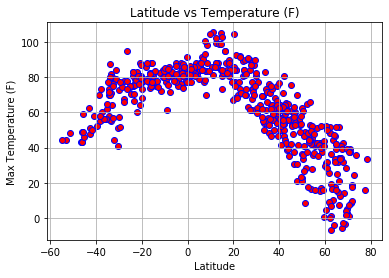

<Figure size 432x288 with 0 Axes>

In [10]:
plt.scatter(latitude, max_temperature, c="red",edgecolors="blue")
plt.title("Latitude vs Temperature (F)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.savefig("../Images/LatitudevTemperature")

## Latitude vs. Humidity Plot

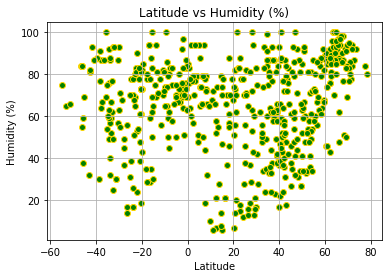

<Figure size 432x288 with 0 Axes>

In [11]:
plt.scatter(latitude, humidity_pct,c="green",edgecolors="gold")
plt.title("Latitude vs Humidity (%)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()
plt.savefig("../Images/LatitudevHumidity")

## Latitude vs. Cloudiness Plot

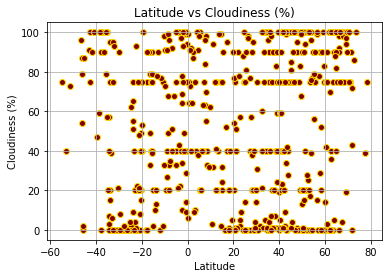

<Figure size 432x288 with 0 Axes>

In [12]:
plt.scatter(latitude, cloudiness_pct,c="maroon",edgecolors="gold")
plt.title("Latitude vs Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()
plt.savefig("../Images/LatitudevCloudiness")

## Latitude vs. Wind Speed Plot

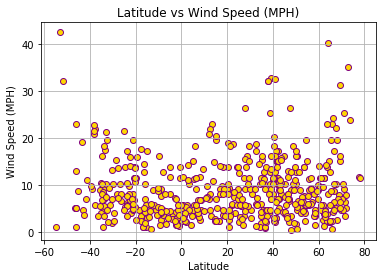

<Figure size 432x288 with 0 Axes>

In [13]:
plt.scatter(latitude, wind_speed_mph,c="gold",edgecolors="purple")
plt.title("Latitude vs Wind Speed (MPH)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (MPH)")
plt.grid()
plt.show()
plt.savefig("../Images/LatitudevWindSpeed")

## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [15]:
# Create Northern and Southern Hemisphere DataFrames
northern_data = weather_data.loc[weather_data["Lat"] > 0]
southern_data = weather_data.loc[weather_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

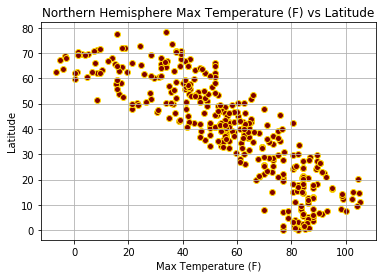

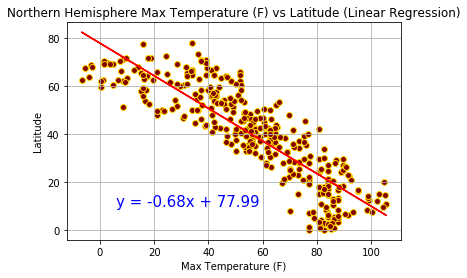

<Figure size 432x288 with 0 Axes>

In [16]:
plt.scatter(northern_data["Max Temp (F)"], northern_data["Lat"],c="maroon",edgecolors="gold")
plt.title("Northern Hemisphere Max Temperature (F) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Max Temperature (F)")
plt.grid()
plt.show()

x_values = northern_data["Max Temp (F)"]
y_values = northern_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="maroon",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Northern Hemisphere Max Temperature (F) vs Latitude (Linear Regression)")
plt.ylabel("Latitude")
plt.xlabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.savefig("../Images/NH Temp vs Latitude")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

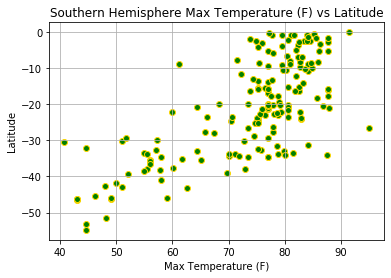

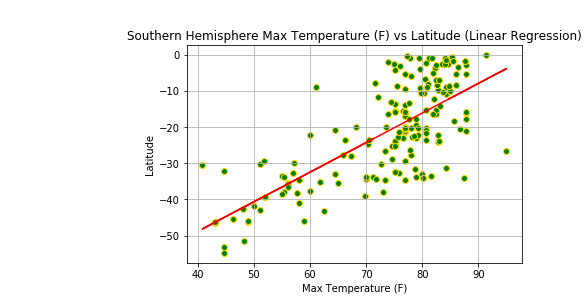

<Figure size 432x288 with 0 Axes>

In [17]:
plt.scatter(southern_data["Max Temp (F)"], southern_data["Lat"],c="green",edgecolors="gold")
plt.title("Southern Hemisphere Max Temperature (F) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Max Temperature (F)")
plt.grid()
plt.show()

x_values = southern_data["Max Temp (F)"]
y_values = southern_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="green",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Southern Hemisphere Max Temperature (F) vs Latitude (Linear Regression)")
plt.ylabel("Latitude")
plt.xlabel("Max Temperature (F)")
plt.grid()
plt.show()
plt.savefig("../Images/SH Temp vs Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

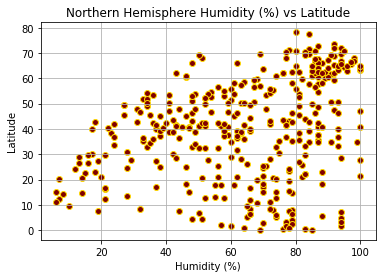

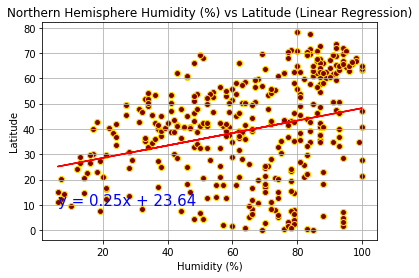

<Figure size 432x288 with 0 Axes>

In [18]:
plt.scatter(northern_data["Humidity %"], northern_data["Lat"],c="maroon",edgecolors="gold")
plt.title("Northern Hemisphere Humidity (%) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.grid()
plt.show()

x_values = northern_data["Humidity %"]
y_values = northern_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="maroon",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Northern Hemisphere Humidity (%) vs Latitude (Linear Regression)")
plt.ylabel("Latitude")
plt.xlabel("Humidity (%)")
plt.grid()
plt.show()
plt.savefig("../Images/NH Humidity vs Latitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

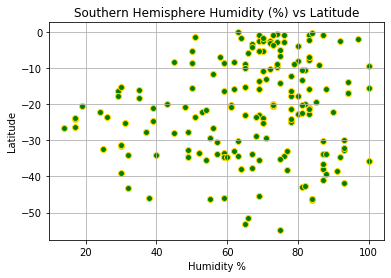

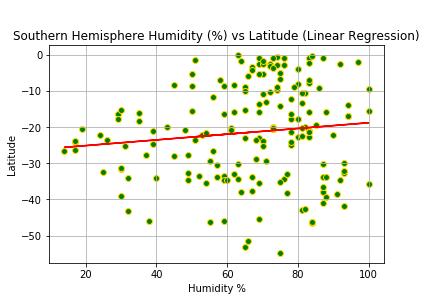

<Figure size 432x288 with 0 Axes>

In [19]:
plt.scatter(southern_data["Humidity %"], southern_data["Lat"],c="green",edgecolors="gold")
plt.title("Southern Hemisphere Humidity (%) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Humidity %")
plt.grid()
plt.show()

x_values = southern_data["Humidity %"]
y_values = southern_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="green",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Southern Hemisphere Humidity (%) vs Latitude (Linear Regression)")
plt.ylabel("Latitude")
plt.xlabel("Humidity %")
plt.grid()
plt.show()
plt.savefig("../Images/SH Humidity vs Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

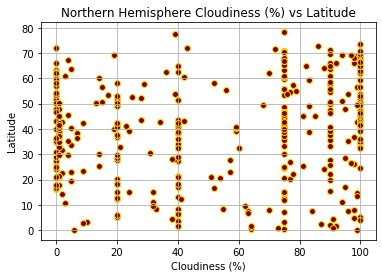

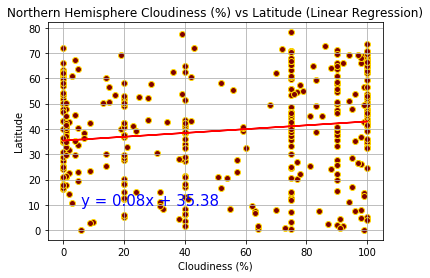

<Figure size 432x288 with 0 Axes>

In [20]:
plt.scatter(northern_data["Cloudiness %"], northern_data["Lat"],c="maroon",edgecolors="gold")
plt.title("Northern Hemisphere Cloudiness (%) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid()
plt.show()

x_values = northern_data["Cloudiness %"]
y_values = northern_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="maroon",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Northern Hemisphere Cloudiness (%) vs Latitude (Linear Regression)")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid()
plt.show()
plt.savefig("../Images/NH Cloudiness vs Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

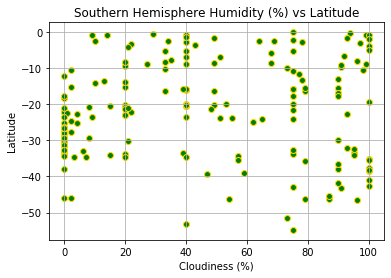

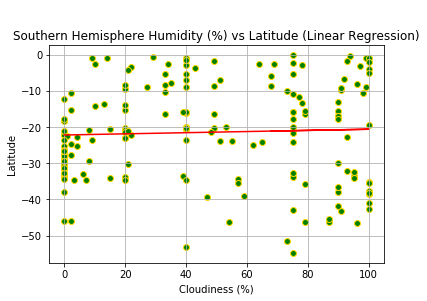

<Figure size 432x288 with 0 Axes>

In [21]:
plt.scatter(southern_data["Cloudiness %"], southern_data["Lat"],c="green",edgecolors="gold")
plt.title("Southern Hemisphere Humidity (%) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid()
plt.show()

x_values = southern_data["Cloudiness %"]
y_values = southern_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="green",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Southern Hemisphere Humidity (%) vs Latitude (Linear Regression)")
plt.ylabel("Latitude")
plt.xlabel("Cloudiness (%)")
plt.grid()
plt.show()
plt.savefig("../Images/SH Cloudiness vs Latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

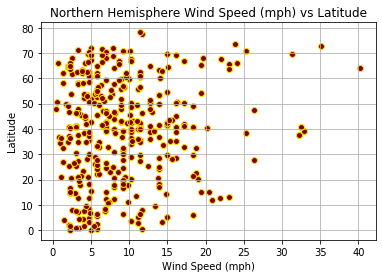

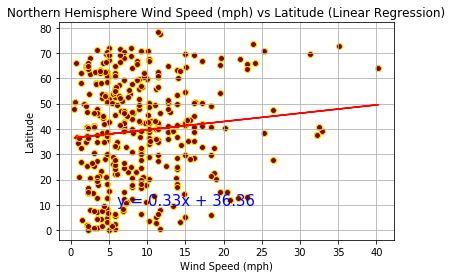

<Figure size 432x288 with 0 Axes>

In [22]:
plt.scatter(northern_data["Wind Speed (mph)"], northern_data["Lat"],c="maroon",edgecolors="gold")
plt.title("Northern Hemisphere Wind Speed (mph) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid()
plt.show()

x_values = northern_data["Wind Speed (mph)"]
y_values = northern_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="maroon",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Northern Hemisphere Wind Speed (mph) vs Latitude (Linear Regression)")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid()
plt.show()
plt.savefig("../Images/NH Wind Speed vs Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

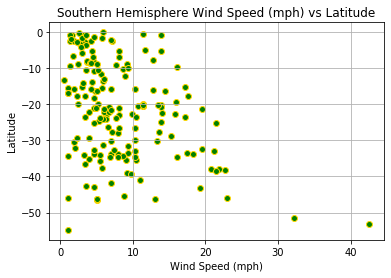

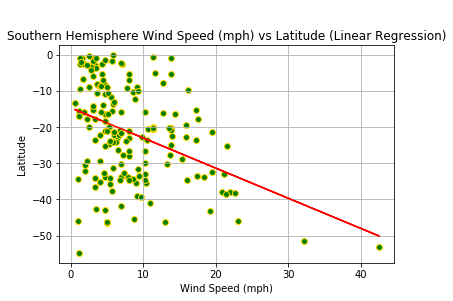

<Figure size 432x288 with 0 Axes>

In [23]:
plt.scatter(southern_data["Wind Speed (mph)"], southern_data["Lat"],c="green",edgecolors="gold")
plt.title("Southern Hemisphere Wind Speed (mph) vs Latitude")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid()
plt.show()

x_values = southern_data["Wind Speed (mph)"]
y_values = southern_data["Lat"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,c="green",edgecolors="gold")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")
plt.title("Southern Hemisphere Wind Speed (mph) vs Latitude (Linear Regression)")
plt.ylabel("Latitude")
plt.xlabel("Wind Speed (mph)")
plt.grid()
plt.show()
plt.savefig("../Images/SH Wind Speed vs Latitude")

In [24]:
weather_data.to_csv("../output_data/city_data.csv")